In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
df_processed = pd.read_csv('../data/processed/processed.csv')
df_processed.shape
X = df_processed.drop(['DELAYED','ARRIVAL_DELAY','DEPARTURE_TIME'], axis=1).copy()

y = df_processed['DELAYED'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Árboles de decisión PRUEBA 1

# rf1_model
{'rf__criterion': 'gini', 'rf__max_depth': 4, 'rf__min_samples_split': 4, 'rf__n_estimators': 10}
Accuracy en los datos de entrenamiento: 0.80
Accuracy en los datos de prueba: 0.79
Precisión en los datos de prueba: 0.98
Recall en los datos de prueba: 0.45
F1-score en los datos de prueba: 0.61
Matriz de confusión:
[[1817   10]
 [ 599  484]]
Área bajo la curva ROC (AUC): 0.72

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('rf', RandomForestClassifier(random_state=42))  # Clasificador Bosque aleatorio
])

# Definir los hiperparámetros a ajustar
parameters = {
    'rf__n_estimators': [10, 60, 90],
    'rf__max_depth': [2, 3, 4],
    'rf__criterion': ['gini', 'entropy'],
    'rf__min_samples_split': [3,4]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
rf1_model = grid_search.best_estimator_
print('rf1_model')
print(grid_search.best_params_)

# Evaluar el rendimiento del modelo en los datos de entrenamiento
y_train_pred = rf1_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en los datos de entrenamiento: {train_accuracy:.2f}')

# Evaluar el rendimiento del modelo en los datos de prueba
y_test_pred = rf1_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy en los datos de prueba: {test_accuracy:.2f}')
print(f'Precisión en los datos de prueba: {test_precision:.2f}')
print(f'Recall en los datos de prueba: {test_recall:.2f}')
print(f'F1-score en los datos de prueba: {test_f1:.2f}')
print('Matriz de confusión:')
print(confusion)

# Calcular el área bajo la curva ROC (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=3, rf__n_estimators=10;, score=0.649 total time=   1.0s
[CV 2/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=3, rf__n_estimators=10;, score=0.690 total time=   0.8s
[CV 3/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=3, rf__n_estimators=10;, score=0.750 total time=   0.8s
[CV 1/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=3, rf__n_estimators=60;, score=0.648 total time=   1.2s
[CV 2/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=3, rf__n_estimators=60;, score=0.651 total time=   1.2s
[CV 3/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=3, rf__n_estimators=60;, score=0.653 total time=   1.1s
[CV 1/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=3, rf__n_estimators=90;, score=0.648 total time=   1.2s
[CV 2/3] END rf__criterion=gini, rf__max_d

## Árboles de decisión PRUEBA 2

# rf2_model
{'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 70}
Accuracy en los datos de entrenamiento: 0.80
Accuracy en los datos de prueba: 0.79
Precisión en los datos de prueba: 1.00
Recall en los datos de prueba: 0.44
F1-score en los datos de prueba: 0.61
Matriz de confusión:
[[1825    2]
 [ 604  479]]
Área bajo la curva ROC (AUC): 0.72

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalador
    ('rf', RandomForestClassifier(random_state=42))  # Clasificador Árbol de decisión
])

# Definir los hiperparámetros a ajustar
parameters = {
    'rf__max_depth': [ 4, 5],
    'rf__n_estimators': [20, 50, 70],
    'rf__criterion': ['gini', 'entropy'],
    'rf__min_samples_split': [2, 3]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy', verbose =3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
rf2_model = grid_search.best_estimator_



print('rf2_model')
print(grid_search.best_params_)
# Evaluar el rendimiento del modelo en los datos de entrenamiento
y_train_pred = rf2_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en los datos de entrenamiento: {train_accuracy:.2f}')



# Evaluar el rendimiento del modelo en los datos de prueba
y_test_pred = rf2_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy en los datos de prueba: {test_accuracy:.2f}')
print(f'Precisión en los datos de prueba: {test_precision:.2f}')
print(f'Recall en los datos de prueba: {test_recall:.2f}')
print(f'F1-score en los datos de prueba: {test_f1:.2f}')
print('Matriz de confusión:')
print(confusion)

# Calcular el área bajo la curva ROC (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END rf__criterion=gini, rf__max_depth=4, rf__min_samples_split=2, rf__n_estimators=20;, score=0.678 total time=   0.8s
[CV 2/3] END rf__criterion=gini, rf__max_depth=4, rf__min_samples_split=2, rf__n_estimators=20;, score=0.787 total time=   0.7s
[CV 3/3] END rf__criterion=gini, rf__max_depth=4, rf__min_samples_split=2, rf__n_estimators=20;, score=0.726 total time=   0.8s
[CV 1/3] END rf__criterion=gini, rf__max_depth=4, rf__min_samples_split=2, rf__n_estimators=50;, score=0.694 total time=   1.1s
[CV 2/3] END rf__criterion=gini, rf__max_depth=4, rf__min_samples_split=2, rf__n_estimators=50;, score=0.756 total time=   1.0s
[CV 3/3] END rf__criterion=gini, rf__max_depth=4, rf__min_samples_split=2, rf__n_estimators=50;, score=0.680 total time=   0.8s
[CV 1/3] END rf__criterion=gini, rf__max_depth=4, rf__min_samples_split=2, rf__n_estimators=70;, score=0.726 total time=   1.0s
[CV 2/3] END rf__criterion=gini, rf__max_de

## Árboles de decisión PRUEBA 3


# rf3_model
{'rf__criterion': 'entropy', 'rf__max_depth': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 60}
Accuracy en los datos de entrenamiento: 0.82
Accuracy en los datos de prueba: 0.81
Precisión en los datos de prueba: 0.98
Recall en los datos de prueba: 0.48
F1-score en los datos de prueba: 0.65
Matriz de confusión:
[[1818    9]
 [ 558  525]]
Área bajo la curva ROC (AUC): 0.74

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalador
    ('rf', RandomForestClassifier(random_state=42))  # Clasificador Árbol de decisión
])

# Definir los hiperparámetros a ajustar
parameters = {
    'rf__n_estimators': [10, 30, 60, 90, 120],
    'rf__max_depth': [2, 3, 4, 5, 6],
    'rf__criterion': ['gini', 'entropy'],
    'rf__min_samples_split': [2, 3, 4, 5]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy', verbose =3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
rf3_model = grid_search.best_estimator_
print('rf3_model')
print(grid_search.best_params_)

# Evaluar el rendimiento del modelo en los datos de entrenamiento
y_train_pred = rf3_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en los datos de entrenamiento: {train_accuracy:.2f}')

# Evaluar el rendimiento del modelo en los datos de prueba
y_test_pred = rf3_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy en los datos de prueba: {test_accuracy:.2f}')
print(f'Precisión en los datos de prueba: {test_precision:.2f}')
print(f'Recall en los datos de prueba: {test_recall:.2f}')
print(f'F1-score en los datos de prueba: {test_f1:.2f}')
print('Matriz de confusión:')
print(confusion)

# Calcular el área bajo la curva ROC (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[CV 1/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=10;, score=0.649 total time=   0.5s
[CV 2/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=10;, score=0.690 total time=   0.5s
[CV 3/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=10;, score=0.750 total time=   0.6s
[CV 1/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=30;, score=0.648 total time=   0.7s
[CV 2/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=30;, score=0.657 total time=   0.8s
[CV 3/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=30;, score=0.651 total time=   0.9s
[CV 1/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=60;, score=0.648 total time=   0.9s
[CV 2/3] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=2, rf__n_estimators=60;, score=0

## Gradient boost class prueba 4

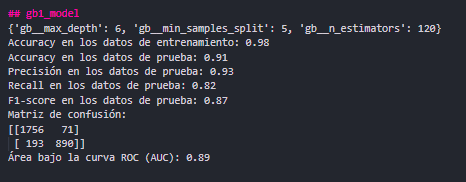

## gb1_model
{'gb__max_depth': 6, 'gb__min_samples_split': 5, 'gb__n_estimators': 120}
Accuracy en los datos de entrenamiento: 0.98
Accuracy en los datos de prueba: 0.91
Precisión en los datos de prueba: 0.93
Recall en los datos de prueba: 0.82
F1-score en los datos de prueba: 0.87
Matriz de confusión:
[[1756   71]
 [ 193  890]]
Área bajo la curva ROC (AUC): 0.89

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalador
    ('gb', GradientBoostingClassifier(random_state=42))  # Clasificador Gradient Boosting
])

# Definir los hiperparámetros a ajustar
parameters = {
    'gb__n_estimators': [10, 30, 60, 90, 120],
    'gb__max_depth': [2, 3, 4, 5, 6],
    'gb__min_samples_split': [2, 3, 4, 5]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
gb1_model = grid_search.best_estimator_
print('gb1_model')
print(grid_search.best_params_)

# Evaluar el rendimiento del modelo en los datos de entrenamiento
y_train_pred = gb1_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en los datos de entrenamiento: {train_accuracy:.2f}')

# Evaluar el rendimiento del modelo en los datos de prueba
y_test_pred = gb1_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy en los datos de prueba: {test_accuracy:.2f}')
print(f'Precisión en los datos de prueba: {test_precision:.2f}')
print(f'Recall en los datos de prueba: {test_recall:.2f}')
print(f'F1-score en los datos de prueba: {test_f1:.2f}')
print('Matriz de confusión:')
print(confusion)

# Calcular el área bajo la curva ROC (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV 1/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=10;, score=0.852 total time=   3.1s
[CV 2/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=10;, score=0.857 total time=   2.6s
[CV 3/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=10;, score=0.851 total time=   2.3s
[CV 4/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=10;, score=0.851 total time=   2.5s
[CV 1/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=30;, score=0.860 total time=   5.9s
[CV 2/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=30;, score=0.863 total time=   6.0s
[CV 3/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=30;, score=0.854 total time=   5.8s
[CV 4/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=30;, score=0.858 total time=   5.7s
[CV 1/4] END gb__max_depth=2, gb__min_samples_split=2, gb__n_estimators=6

In [1]:
import pandas as pd

data = {'Model': ['rf1_model', 'rf2_model', 'rf3_model', 'gb1_model'],
        'Accuracy (Train)': [0.80, 0.80, 0.82, 0.98],
        'Accuracy (Test)': [0.79, 0.79, 0.81, 0.91],
        'Precision (Test)': [0.98, 1.00, 0.98, 0.93],
        'Recall (Test)': [0.45, 0.44, 0.48, 0.82],
        'F1-score (Test)': [0.61, 0.61, 0.65, 0.87],
        'AUC': [0.72, 0.72, 0.74, 0.89]}

df = pd.DataFrame(data)

## gb1_model tiene el mejor rendimiento en general

In [2]:
df #gb1_model tiene el mejor rendimiento en general

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1-score (Test),AUC
0,rf1_model,0.80,0.79,0.98,0.45,0.61,0.72
1,rf2_model,0.80,0.79,1.00,0.44,0.61,0.72
2,rf3_model,0.82,0.81,0.98,0.48,0.65,0.74
3,gb1_model,0.98,0.91,0.93,0.82,0.87,0.89


In [ ]:
import pickle
import yaml

# Guardar el modelo entrenado en un archivo pickle
with open('GradientBosst.pkl', 'wb') as archivo_salida:
    pickle.dump(gb1_model, archivo_salida)

# Guardar la configuración del modelo en un archivo YAML
model_config = {
    'model_name': 'Gradient Boosting',
    'best_params': gb1_model.get_params()
}

with open('GradientBosst_config.yaml', 'w') as f:
    yaml.dump(model_config, f)